In [56]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
#import unidecode
import requests
import time
#import urllib.request as urllib2

In [57]:
# creating url object
url = "https://www.google.com/flights#flt=/m/0c8tk./m/09c17.2018-12-17*/m/09c17./m/0c8tk.2019-01-31;c:INR;e:1;sd:1;t:f"
#my_path = '/Users⁩/rakeshhm⁩/Downloads⁩/⁨phantomjs-2.1.1-macosx/⁨bin⁩/phantomjs'
#print(my_path)
# instantiating the webdriver
driver = webdriver.Chrome()
#dCap = dict(DesiredCapabilities.CHROME)
# setting User Agent
#dCap["chromedriver.page.settings.userAgent"] = ("Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.0 Safari/605.1.15")
#driver = webdriver.Chrome(desired_capabilities=dCap,service_args=['---ignore-ssl-errors=true'])
#driver.implicitly_wait(20)
driver.get(url)
driver.find_element_by_xpath('//*[@id="flt-app"]/div[2]/main[3]/div[9]/div[1]/div[3]/div[2]/div/div[3]/div/div[6]/div').click()
#browser.implicitly_wait(10)
#browser.save_screenshot(r"FlightsPricings.png")
# extracting data
time.sleep(2)
#content = urllib2.urlopen(url).read()

#page_response = requests.get(url,timeout=10)
ps = BeautifulSoup(driver.page_source,'html.parser')
#best_prices.append(tag.text.replace('₹','').replace(',',''))
#best_price_tags = ps.find_all('span',class_='gws-flights__starting-price',limit=None)

In [58]:

ps.prettify()
all_a = []

best_price_tags = ps.find_all('span')
best_prices = []
for tag in best_price_tags:
    #tag.get('data-exact-price')
    best_prices.append(tag.text)
#est_price_tags
#best_prices

In [66]:
#best_price_tags = ps.find_all('span',{'class':'gws-flights__starting-price'})
price_list = []
for b in best_prices:
    b = [b]
    b = ''.join(str(e) for e in b)
    #print(b)
    for a in b:
        #print(f"-- {a}")
        if a == '₹':
            indexofB = b.index(a)
            #print(indexofB)
            #price_list.append(int(unidecode.unidecode(b[indexofB+2:indexofB+8]).replace(',','')))
            price_list.append(float((b[indexofB+2:indexofB+8]).replace(',','')))

In [72]:
fares = pd.DataFrame(price_list,columns=['prices'])
fares.min(),fares.max()

(prices    2165.0
 dtype: float64, prices    4893.0
 dtype: float64)

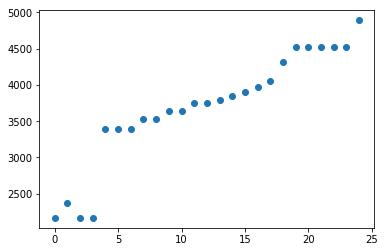

In [71]:
plt.scatter(np.arange(len(fares['prices'])),fares['prices'])

In [73]:
# importing clustering algorithms
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [75]:
px = [x for x in fares['prices']]
df = pd.DataFrame(px,columns=['fare']).reset_index()

In [133]:
# Initializing StandardScaler object
X = StandardScaler().fit_transform(df)
# Initializing DBSCAN object
db_scan = DBSCAN(eps=.2,min_samples=1).fit(X)

labels = db_scan.labels_
clusters = len(set(db_scan.labels_))
unique_labels = set(db_scan.labels_)
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Text(0.5,1,'Total Clusters 9')

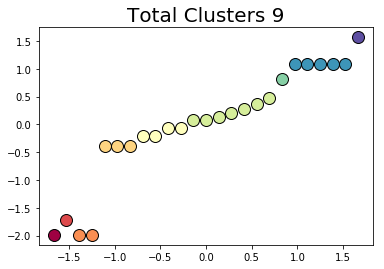

In [134]:
for k,c in zip(unique_labels,colors):
    class_memmber_mask = (labels == k)
    xy = X[class_memmber_mask]
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor = c, markeredgecolor = 'k', markersize = 12)
plt.title(f"Total Clusters {clusters}", fontsize = 20, y = 1)

In [130]:
px[10]


1000

In [136]:
def test_clusters(data_series, eps_val, swap_index, swap_value):
    data_series[swap_index] = swap_value
    df = pd.DataFrame(data_series,columns=['fare']).reset_index()
    # Initializing StandardScaler object
    X = StandardScaler().fit_transform(df)
    # Initializing DBSCAN object
    db_scan = DBSCAN(eps=eps_val,min_samples=1).fit(X)

    labels = db_scan.labels_
    clusters = len(set(db_scan.labels_))
    unique_labels = set(db_scan.labels_)
    colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))
    for k,c in zip(unique_labels,colors):
        class_memmber_mask = (labels == k)
        xy = X[class_memmber_mask]
        plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor = c, markeredgecolor = 'k', markersize = 12)
    plt.title(f"Total Clusters {clusters}", fontsize = 20, y = 1)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


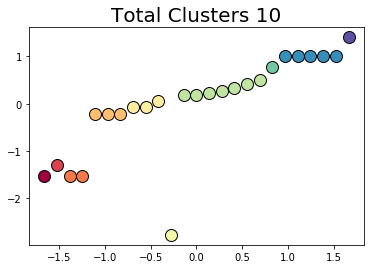

In [132]:
test_clusters(px, 0.2, 10, 1000)

In [135]:
#pf = pd.DataFrame()
pf = pd.concat([df,pd.DataFrame(db_scan.labels_,columns=['Cluster'])],axis=1)
pf

,index,fare,Cluster
0,0,2165.0,0
1,1,2368.0,1
2,2,2165.0,2
3,3,2165.0,2
4,4,3388.0,3
5,5,3388.0,3
6,6,3388.0,3
7,7,3524.0,4
8,8,3524.0,4
9,9,3634.0,4


In [138]:
rf = pf.groupby('Cluster')['fare'].agg(['min','count'])
rf

,min,count
Cluster,,
0,2165.0,1
1,2368.0,1
2,2165.0,2
3,3388.0,3
4,3524.0,4
5,3753.0,7
6,4315.0,1
7,4528.0,5
8,4893.0,1


In [142]:
# quantile breakdown information
rf.describe([.1,.2,.5,.75,.9])

,min,count
count,9.000000,9.000000
mean,3455.444444,2.777778
std,1034.806396,2.166667
min,2165.000000,1.000000
10%,2165.000000,1.000000
20%,2286.800000,1.000000
50%,3524.000000,2.000000
75%,4315.000000,4.000000
90%,4601.000000,5.400000
max,4893.000000,7.000000
